In [28]:
import numpy as np
from sklearn.model_selection import train_test_split

import utils
import layers
import optimizers
from metrics import *
from activations import *
from loss_functions import *
from neural_network import NeuralNetwork

### Constants and Hyperparameters

In [29]:
n_samples = 1000 # Number of samples to generate
train_test_split_pct = 0.2 # Percentage of samples to use for testing
train_valid_split = 0.2 # Percentage of samples to use for validation
learning_rate = 2e-04 # Learning rate for the optimizer
batch_size = 32 # Number of samples to use for each batch
epochs = 300 # Number of epochs to train the model
seed = 1234 # Seed for reproducibility

In [30]:
# Set the seed for reproducibility
np.random.seed(seed)

### Data loading

In [31]:
def generate_sine_dataset(n_samples: int, noise: float = 0.0) -> tuple[np.ndarray, np.ndarray]:
    """
    Method to generate a dataset of samples and targets of a sine function
    
    Parameters: 
    - n_samples (int): Number of samples to generate
    - noise float: Standard deviation of the Gaussian noise. Default is 0 (no noise)
    
    Returns:
    - tuple[np.ndarray, np.ndarray]: Features and target of the dataset
    """

    # Generate random samples
    X = np.random.uniform(-2*np.pi, 2*np.pi, (n_samples, 1)).astype(np.float32)

    # Compute the target
    y = np.sin(X) + np.random.normal(0, noise, (n_samples, 1)).astype(np.float32)
    
    # Return the dataset
    return X, y

In [32]:

# Generate the synthetic dataset of a sine function with some gaussian noise
X, y = generate_sine_dataset(n_samples, noise=0.15)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=train_test_split_pct, random_state=seed)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=train_valid_split, random_state=seed)

# Print the dataset information
print('Training set:', X_train.shape, y_train.shape)
print('Validation set:', X_valid.shape, y_valid.shape)
print('Testing set:', X_test.shape, y_test.shape)

Training set: (640, 1) (640, 1)
Validation set: (160, 1) (160, 1)
Testing set: (200, 1) (200, 1)


### Data visualization

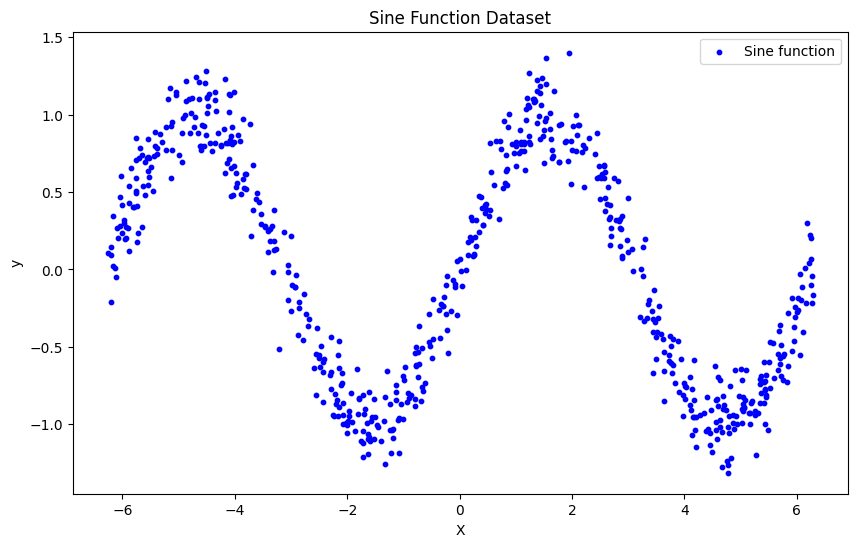

In [33]:
utils.plot_data(
    datasets = [
        {'points': np.array(list(zip(X_train, y_train))), 'label': "Sine function", 'color': "blue", 'size': 10, 'plot_type': 'scatter'},
    ],
    title = "Sine Function Dataset",
    xlabel = "X",
    ylabel = "y"
)

### Building the model

In [34]:
# Create the model
model = NeuralNetwork([
    layers.Dense(num_units=256, activation=Tanh()),
    layers.Dense(num_units=128, activation=Tanh()),
    layers.Dense(num_units=32, activation=Tanh()),
    layers.Dense(num_units=1)
])

# Initialize the optimizer
optimizer = optimizers.Adam(
    learning_rate = learning_rate,
    weight_decay = 0.01
)

# Initialize the error function
error_fn = MeanSquareError()

In [35]:
# Set the input shape of the model
model.set_input_shape(batch_size=batch_size, n_features=X_train.shape[-1])

In [36]:
# Display the model summary
model.summary()


Neural Network (ID: 2)

--------------------------------------------------------------------------------
Layer (type)                            Output Shape        Trainable params #  
dense_1 (Dense)                         (32, 256)           512                 
--------------------------------------------------------------------------------
dense_2 (Dense)                         (32, 128)           32896               
--------------------------------------------------------------------------------
dense_3 (Dense)                         (32, 32)            4128                
--------------------------------------------------------------------------------
dense_4 (Dense)                         (32, 1)             33                  
Total trainable parameters: 37569
--------------------------------------------------------------------------------


### Training the model

In [37]:
# Fit the model
history = model.fit(
    X_train = X_train, 
    y_train = y_train,
    optimizer = optimizer,
    loss_fn = error_fn,
    X_valid = X_valid,
    y_valid = y_valid,
    batch_size = batch_size,
    epochs = epochs,
    metrics = [mean_absolute_error]
)

Epoch 1/300 --> Training loss: 0.4188 - Training mean absolute error: 0.4619 | Validation loss: 0.2788 - Validation mean absolute error: 0.4645
Epoch 2/300 --> Training loss: 0.1768 - Training mean absolute error: 0.2814 | Validation loss: 0.1247 - Validation mean absolute error: 0.2773
Epoch 3/300 --> Training loss: 0.1233 - Training mean absolute error: 0.2705 | Validation loss: 0.1212 - Validation mean absolute error: 0.2701
Epoch 4/300 --> Training loss: 0.1212 - Training mean absolute error: 0.2966 | Validation loss: 0.1536 - Validation mean absolute error: 0.3028
Epoch 5/300 --> Training loss: 0.1174 - Training mean absolute error: 0.2712 | Validation loss: 0.1146 - Validation mean absolute error: 0.2693
Epoch 6/300 --> Training loss: 0.1100 - Training mean absolute error: 0.2589 | Validation loss: 0.1082 - Validation mean absolute error: 0.2593
Epoch 7/300 --> Training loss: 0.1116 - Training mean absolute error: 0.2552 | Validation loss: 0.1094 - Validation mean absolute error:

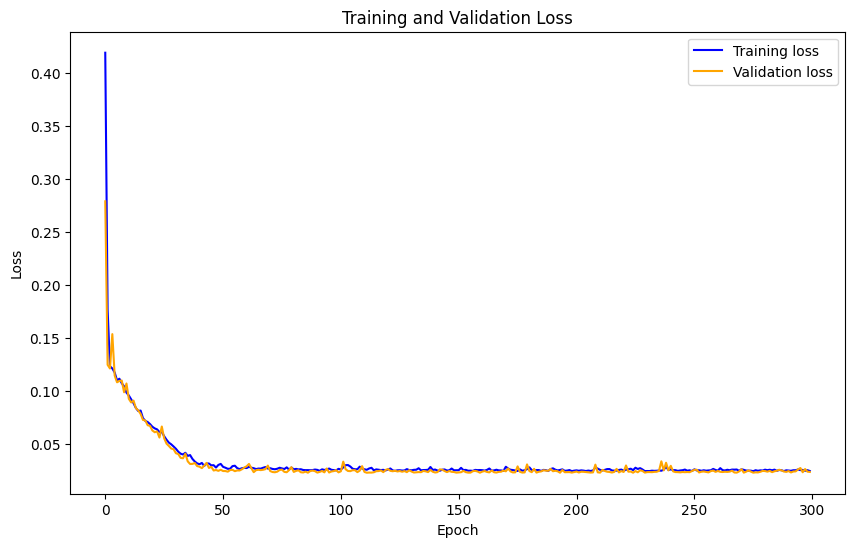

In [38]:
# Plot the training and validation loss
utils.plot_history(history["train"]["loss"], history["valid"]["loss"], "Training and Validation Loss", "Epoch", "Loss")

### Evaluation

In [39]:
# Set the model to evaluation mode
model.eval()

# Predict the labels
predictions = model.forward(X_test)

In [40]:
# Calculate the mean absolute error
mae = mean_absolute_error(y_test, predictions)

# Print the mean absolute error
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.10865355010765612


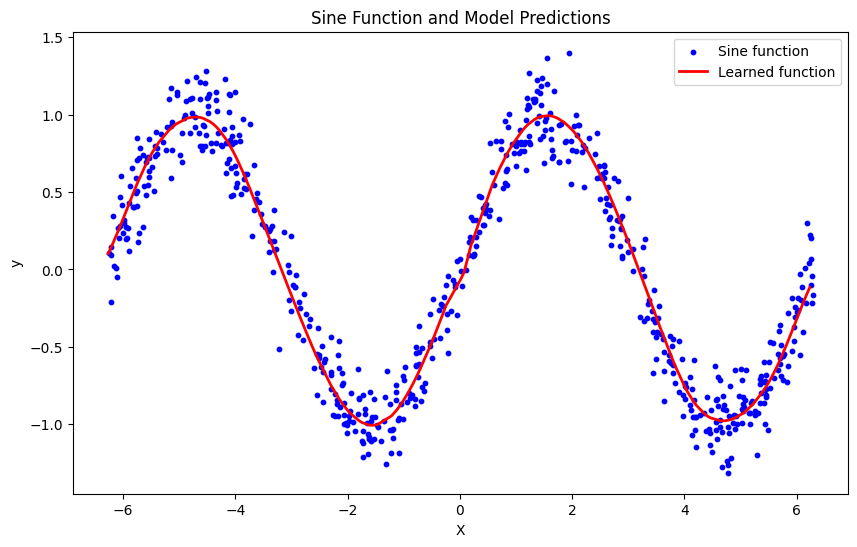

In [41]:
# Plot the sine function and the model predictions
utils.plot_data(
    datasets = [
        {'points': np.array(list(zip(X_train, y_train))), 'label': "Sine function", 'color': "blue", 'size': 10, 'plot_type': 'scatter'},
        {'points': np.array(list(zip(X_test, predictions))), 'label': "Learned function", 'color': "red", 'plot_type': 'line'}
    ],
    title = "Sine Function and Model Predictions",
    xlabel = "X",
    ylabel = "y"
)